In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from plotingfun import *
from helper_functions import *
# import optuna
# from optuna.integration import TFKerasPruningCallback
# from optuna.trial import TrialState
import tensorflow as tf
from sklearn.model_selection import KFold,GroupKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns



In [2]:
# features = pd.read_csv("F:\\Group 19\\newApproachMATLAB\\features\\four_channels\\features.csv", header=None)
# features

# label = pd.read_csv("F:\\Group 19\\newApproachMATLAB\\features\\four_channels\\labels.csv", header=None)
# label

# names = pd.read_csv("F:\\Group 19\\newApproachMATLAB\\features\\four_channels\\groups.csv", header=None)
# names

# data = pd.concat([names,features,label], ignore_index=False,axis=1)
# data

# data.to_csv('final_features.csv', index=False)

In [3]:
data = pd.read_csv("F:\\Group 19\\newApproachMATLAB\\features\\final_features.csv",header=None)
data=data[1:]

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
1,tr03-0005,11.838384,3.687221,213.713734,95.093233,5223.568948,0.085301,0.129810,0.159897,0.133512,...,-0.068037,0.022072,-0.030704,-0.048373,0.025466,-0.025351,-0.056618,-0.001922,-0.000657,6
2,tr03-0005,11.873360,3.210082,206.750686,93.774949,5057.975587,0.091060,0.132019,0.162783,0.126157,...,-0.031062,0.002729,-0.002707,0.063870,0.020179,0.075819,-0.002547,0.086650,-0.009901,6
3,tr03-0005,11.864793,2.494369,206.170497,93.468677,5341.692649,0.093691,0.136101,0.162830,0.115294,...,0.064203,0.016455,0.107524,0.025673,-0.023887,-0.035143,0.028481,0.014399,-0.089909,6
4,tr03-0005,11.861838,1.154725,213.061185,95.159899,6167.674164,0.093310,0.140412,0.159958,0.106273,...,-0.023822,0.043558,0.031559,0.066844,-0.003058,0.037149,-0.037936,0.093463,-0.037793,6
5,tr03-0005,11.811886,0.548218,220.890395,97.769892,7153.931355,0.095280,0.141574,0.157143,0.103782,...,-0.017267,-0.033110,0.004993,-0.065029,-0.045097,-0.034140,-0.021747,0.035709,0.014168,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919242,tr14-0291,9.126265,-6.747966,112.640620,88.297985,132.365813,0.122106,0.131850,0.136733,0.133890,...,0.068897,-0.016020,0.017231,-0.048754,0.009488,-0.007705,0.000256,-0.050827,0.036063,2
919243,tr14-0291,9.202971,-6.231649,98.297751,88.621311,111.474033,0.123212,0.129555,0.137837,0.135352,...,0.032180,-0.011895,-0.020704,-0.045991,-0.090781,0.001906,-0.069776,-0.049738,0.034317,2
919244,tr14-0291,9.127710,-6.152886,99.144110,88.588029,91.065046,0.123646,0.127746,0.139256,0.135016,...,0.166728,-0.041358,0.186003,-0.072199,0.025414,0.005476,-0.001281,0.089995,-0.021268,2
919245,tr14-0291,9.036572,-6.139675,100.274104,88.686415,73.953992,0.123435,0.126995,0.140578,0.131824,...,-0.164801,-0.075886,0.033956,-0.008692,0.011696,0.053695,-0.048150,0.130825,0.072898,2


<h1><b>XGBoost

In [6]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []
for i in tqdm(range(5)):
    # Generate a list of unique IDs from your features
    unique_ids = data[0].unique()

    # Randomly select 10 unique IDs
    random_ids = pd.Series(unique_ids).sample(90).tolist()

    # Filter the features
    random_10 = data[data[0].isin(random_ids)]


    # Extract the features and target variable from the sample
    X = random_10.drop([0,473], axis=1)
    y = random_10[473]
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0,inplace=True)
    X = X.values
    y = y.values

    # Change labels from 1-index based to 0-index based (reason: features imported from matlab)
    y=y-1


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelxgboost = xgb.XGBClassifier()
    modelxgboost.fit(X_train_scaled, y_train)
    y_pred = modelxgboost.predict(X_test_scaled)
        
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
        
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
        
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
        
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

xgboost_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}



  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [24:19<00:00, 291.88s/it]


In [6]:
accuracy_scores

[0.6667868300889209,
 0.6518717866323908,
 0.6693074881364112,
 0.6853434504792332,
 0.6766881221764682]

In [7]:
xgboost_score

{'Accuracy': 0.6699995355026849,
 'F1-Score': 0.5551652473648367,
 'Recall': 0.5315567346541845,
 'Precision': 0.6382532403375138}

<h1><b>Catboost

In [8]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []
for i in tqdm(range(5)):
    # Generate a list of unique IDs from your features
    unique_ids = data[0].unique()

    # Randomly select 10 unique IDs
    random_ids = pd.Series(unique_ids).sample(90).tolist()

    # Filter the features
    random_10 = data[data[0].isin(random_ids)]


    # Extract the features and target variable from the sample
    X = random_10.drop([0,473], axis=1)
    y = random_10[473]

    # Change labels from 1-index based to 0-index based (reason: features imported from matlab)
    y=y-1

    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelcatboost = CatBoostClassifier(verbose=1)
    modelcatboost.fit(X_train_scaled, y_train)
    y_pred = modelcatboost.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

catboost_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}


  0%|          | 0/5 [00:00<?, ?it/s]

Learning rate set to 0.097276
0:	learn: 1.6613504	total: 411ms	remaining: 6m 51s
1:	learn: 1.5632482	total: 630ms	remaining: 5m 14s
2:	learn: 1.4825894	total: 858ms	remaining: 4m 45s
3:	learn: 1.4216274	total: 1.1s	remaining: 4m 33s
4:	learn: 1.3685470	total: 1.32s	remaining: 4m 23s
5:	learn: 1.3188581	total: 1.55s	remaining: 4m 17s
6:	learn: 1.2812616	total: 1.77s	remaining: 4m 11s
7:	learn: 1.2476967	total: 1.99s	remaining: 4m 6s
8:	learn: 1.2175406	total: 2.22s	remaining: 4m 4s
9:	learn: 1.1887480	total: 2.44s	remaining: 4m 1s
10:	learn: 1.1624955	total: 2.67s	remaining: 4m
11:	learn: 1.1391785	total: 2.9s	remaining: 3m 58s
12:	learn: 1.1197478	total: 3.13s	remaining: 3m 57s
13:	learn: 1.1017574	total: 3.34s	remaining: 3m 55s
14:	learn: 1.0844096	total: 3.56s	remaining: 3m 53s
15:	learn: 1.0694755	total: 3.79s	remaining: 3m 53s
16:	learn: 1.0522390	total: 4.04s	remaining: 3m 53s
17:	learn: 1.0416178	total: 4.26s	remaining: 3m 52s
18:	learn: 1.0308258	total: 4.46s	remaining: 3m 50s
1

 20%|██        | 1/5 [03:34<14:17, 214.42s/it]

999:	learn: 0.3257652	total: 3m 31s	remaining: 0us
Learning rate set to 0.09732
0:	learn: 1.6539767	total: 255ms	remaining: 4m 14s
1:	learn: 1.5589703	total: 475ms	remaining: 3m 57s
2:	learn: 1.4844723	total: 707ms	remaining: 3m 54s
3:	learn: 1.4202198	total: 939ms	remaining: 3m 53s
4:	learn: 1.3676932	total: 1.18s	remaining: 3m 54s
5:	learn: 1.3255182	total: 1.4s	remaining: 3m 52s
6:	learn: 1.2867957	total: 1.64s	remaining: 3m 52s
7:	learn: 1.2547319	total: 1.86s	remaining: 3m 50s
8:	learn: 1.2232520	total: 2.1s	remaining: 3m 50s
9:	learn: 1.1961100	total: 2.32s	remaining: 3m 49s
10:	learn: 1.1739036	total: 2.55s	remaining: 3m 49s
11:	learn: 1.1524387	total: 2.8s	remaining: 3m 50s
12:	learn: 1.1325941	total: 3.04s	remaining: 3m 50s
13:	learn: 1.1172854	total: 3.27s	remaining: 3m 50s
14:	learn: 1.1016254	total: 3.48s	remaining: 3m 48s
15:	learn: 1.0883481	total: 3.7s	remaining: 3m 47s
16:	learn: 1.0754521	total: 3.94s	remaining: 3m 47s
17:	learn: 1.0632576	total: 4.16s	remaining: 3m 46

 40%|████      | 2/5 [07:10<10:46, 215.36s/it]

999:	learn: 0.3465709	total: 3m 33s	remaining: 0us
Learning rate set to 0.097338
0:	learn: 1.6505732	total: 246ms	remaining: 4m 6s
1:	learn: 1.5497388	total: 479ms	remaining: 3m 58s
2:	learn: 1.4689175	total: 720ms	remaining: 3m 59s
3:	learn: 1.4042099	total: 955ms	remaining: 3m 57s
4:	learn: 1.3503577	total: 1.2s	remaining: 3m 57s
5:	learn: 1.3078389	total: 1.43s	remaining: 3m 57s
6:	learn: 1.2662043	total: 1.65s	remaining: 3m 54s
7:	learn: 1.2306086	total: 1.89s	remaining: 3m 53s
8:	learn: 1.2010904	total: 2.11s	remaining: 3m 52s
9:	learn: 1.1738682	total: 2.34s	remaining: 3m 51s
10:	learn: 1.1491823	total: 2.56s	remaining: 3m 49s
11:	learn: 1.1264775	total: 2.78s	remaining: 3m 48s
12:	learn: 1.1064664	total: 2.99s	remaining: 3m 47s
13:	learn: 1.0870274	total: 3.23s	remaining: 3m 47s
14:	learn: 1.0708115	total: 3.44s	remaining: 3m 45s
15:	learn: 1.0578787	total: 3.65s	remaining: 3m 44s
16:	learn: 1.0442478	total: 3.87s	remaining: 3m 43s
17:	learn: 1.0312844	total: 4.09s	remaining: 3m

 60%|██████    | 3/5 [10:46<07:11, 215.83s/it]

999:	learn: 0.3432381	total: 3m 33s	remaining: 0us
Learning rate set to 0.097373
0:	learn: 1.6626504	total: 257ms	remaining: 4m 16s
1:	learn: 1.5720772	total: 495ms	remaining: 4m 6s
2:	learn: 1.4975760	total: 726ms	remaining: 4m 1s
3:	learn: 1.4368635	total: 952ms	remaining: 3m 57s
4:	learn: 1.3872917	total: 1.19s	remaining: 3m 56s
5:	learn: 1.3440541	total: 1.43s	remaining: 3m 57s
6:	learn: 1.3062371	total: 1.69s	remaining: 3m 59s
7:	learn: 1.2719332	total: 1.94s	remaining: 4m
8:	learn: 1.2412417	total: 2.2s	remaining: 4m 2s
9:	learn: 1.2154937	total: 2.44s	remaining: 4m 1s
10:	learn: 1.1924550	total: 2.65s	remaining: 3m 58s
11:	learn: 1.1695346	total: 2.89s	remaining: 3m 57s
12:	learn: 1.1490015	total: 3.11s	remaining: 3m 55s
13:	learn: 1.1330401	total: 3.35s	remaining: 3m 55s
14:	learn: 1.1169738	total: 3.56s	remaining: 3m 53s
15:	learn: 1.1043790	total: 3.79s	remaining: 3m 52s
16:	learn: 1.0914011	total: 4.01s	remaining: 3m 52s
17:	learn: 1.0793364	total: 4.24s	remaining: 3m 51s
18

 80%|████████  | 4/5 [14:24<03:36, 216.50s/it]

999:	learn: 0.3312315	total: 3m 34s	remaining: 0us
Learning rate set to 0.097392
0:	learn: 1.6451908	total: 237ms	remaining: 3m 56s
1:	learn: 1.5390082	total: 474ms	remaining: 3m 56s
2:	learn: 1.4563953	total: 707ms	remaining: 3m 55s
3:	learn: 1.3914712	total: 936ms	remaining: 3m 53s
4:	learn: 1.3371936	total: 1.17s	remaining: 3m 52s
5:	learn: 1.2920049	total: 1.41s	remaining: 3m 52s
6:	learn: 1.2544503	total: 1.63s	remaining: 3m 51s
7:	learn: 1.2207630	total: 1.86s	remaining: 3m 51s
8:	learn: 1.1852982	total: 2.11s	remaining: 3m 52s
9:	learn: 1.1588750	total: 2.33s	remaining: 3m 50s
10:	learn: 1.1322595	total: 2.57s	remaining: 3m 51s
11:	learn: 1.1077110	total: 2.81s	remaining: 3m 51s
12:	learn: 1.0885763	total: 3.03s	remaining: 3m 50s
13:	learn: 1.0723063	total: 3.24s	remaining: 3m 48s
14:	learn: 1.0539697	total: 3.48s	remaining: 3m 48s
15:	learn: 1.0388502	total: 3.7s	remaining: 3m 47s
16:	learn: 1.0239796	total: 3.93s	remaining: 3m 47s
17:	learn: 1.0087558	total: 4.16s	remaining: 3

100%|██████████| 5/5 [18:02<00:00, 216.44s/it]

999:	learn: 0.3214138	total: 3m 34s	remaining: 0us


<b><h1>SVM

In [9]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []
for i in tqdm(range(5)):
    # Generate a list of unique IDs from your features
    unique_ids = data[0].unique()

    # Randomly select 10 unique IDs
    random_ids = pd.Series(unique_ids).sample(20).tolist()

    # Filter the features
    random_10 = data[data[0].isin(random_ids)]


    # Extract the features and target variable from the sample
    X = random_10.drop([0,473], axis=1)
    y = random_10[473]

    # Change labels from 1-index based to 0-index based (reason: features imported from matlab)
    y=y-1

    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelSVC= SVC(verbose=True)
    modelSVC.fit(X_train_scaled, y_train)
    y_pred = modelSVC.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

SVM_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}


  0%|          | 0/5 [00:00<?, ?it/s]

[LibSVM]

 20%|██        | 1/5 [00:54<03:37, 54.45s/it]

[LibSVM]

 40%|████      | 2/5 [01:53<02:51, 57.11s/it]

[LibSVM]

 60%|██████    | 3/5 [02:55<01:58, 59.34s/it]

[LibSVM]

 80%|████████  | 4/5 [03:51<00:57, 57.97s/it]

[LibSVM]

100%|██████████| 5/5 [05:01<00:00, 60.21s/it]


<h1><b>KNeighborsClassifier

In [10]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []
for i in tqdm(range(5)):
    # Generate a list of unique IDs from your features
    unique_ids = data[0].unique()

    # Randomly select 10 unique IDs
    random_ids = pd.Series(unique_ids).sample(20).tolist()

    # Filter the features
    random_10 = data[data[0].isin(random_ids)]


    # Extract the features and target variable from the sample
    X = random_10.drop([0,473], axis=1)
    y = random_10[473]

    # Change labels from 1-index based to 0-index based (reason: features imported from matlab)
    y=y-1

    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=False)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelKn= make_pipeline(StandardScaler(),
                   KNeighborsClassifier(n_neighbors=20))
    modelKn.fit(X_train_scaled, y_train)
    y_pred = modelKn.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

Kn_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}

 20%|██        | 1/5 [00:01<00:05,  1.30s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 80%|████████  | 4/5 [00:04<00:01,  1.15s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


<h1><b>Comparison

------------------------------------------------------------

In [11]:
score={"XGBOOST Model":xgboost_score,"CATBOOST Model":catboost_score,"SVM Model":SVM_score,"KNeighborsClassifier Model":Kn_score}

In [13]:
score=pd.DataFrame.from_dict(score, orient='index')

In [14]:
highlighted_score = score.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)

highlighted_df = score.style.highlight_max(color='blue').highlight_min(color='red')
cm = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
highlighted_df.background_gradient(cmap=cm).set_caption("Lowest values in red, highest values in blue")


,Accuracy,F1-Score,Recall,Precision
XGBOOST Model,0.670000,0.555165,0.531557,0.638253
CATBOOST Model,0.673850,0.581691,0.556763,0.654808
SVM Model,0.592385,0.434877,0.446926,0.554310
KNeighborsClassifier Model,0.221433,0.101568,0.175055,0.221187


,Accuracy,F1-Score,Recall,Precision
XGBOOST Model,0.670000,0.555165,0.531557,0.638253
CATBOOST Model,0.673850,0.581691,0.556763,0.654808
SVM Model,0.592385,0.434877,0.446926,0.554310
KNeighborsClassifier Model,0.221433,0.101568,0.175055,0.221187


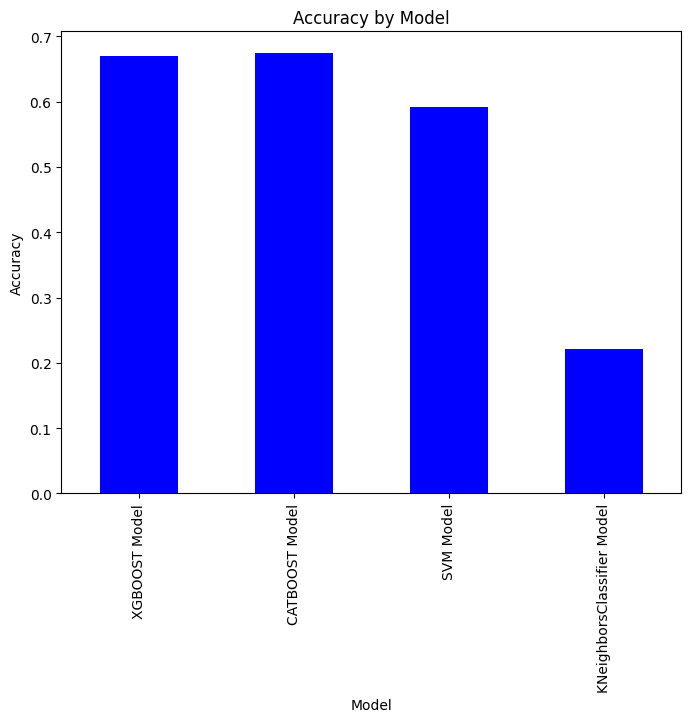

In [15]:
ax = score['Accuracy'].plot(kind='bar', figsize=(8,6), color='blue')
ax.set_title('Accuracy by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


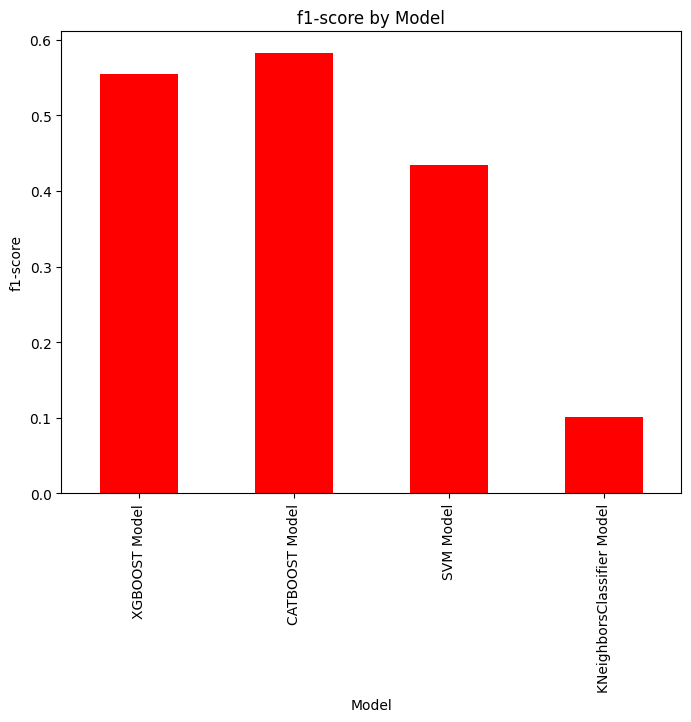

In [16]:
ax = score['F1-Score'].plot(kind='bar', figsize=(8,6), color='red')
ax.set_title('f1-score by Model')
ax.set_xlabel('Model')
ax.set_ylabel('f1-score')
plt.show()
